In [1]:
import numpy as np
import openml
import pickle

from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import StratifiedKFold
# from proglearn.forest import UncertaintyForest

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans

from graspologic.embed import AdjacencySpectralEmbed
from graspologic.simulations import sbm
from graspologic.plot import heatmap, pairplot

from sklearn.utils.extmath import svd_flip
from sklearn.decomposition._pca import _infer_dimension
from scipy import linalg

import warnings
warnings.filterwarnings('ignore')
np.random.seed(8889)
%matplotlib inline

In [3]:
from sklearn.utils.extmath import svd_flip
from sklearn.decomposition._pca import _infer_dimension
from scipy import linalg

def minka(X):
    
    n_components = 'mle'
    n_samples = X.shape[0]
    U, S, Vt = linalg.svd(X, full_matrices=False)
    # flip eigenvectors' sign to enforce deterministic output
    U, Vt = svd_flip(U, Vt)

    components_ = Vt

    # Get variance explained by singular values
    explained_variance_ = (S ** 2) / (n_samples - 1)
    total_var = explained_variance_.sum()
    explained_variance_ratio_ = explained_variance_ / total_var
    singular_values_ = S.copy()  # Store the singular values.
    # Postprocess the number of components required
    if n_components == 'mle':
        #print(explained_variance_.shape[0])
        #print(n_samples)
        n_components = \
            _infer_dimension(explained_variance_, n_samples)
    return n_components

In [4]:
from graspologic.embed import select_dimension

In [5]:
benchmark_suite = openml.study.get_suite('OpenML-CC18') # obtain the benchmark suite

In [9]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from ya_pca.linalg_utils import svd_wrapper
from ya_pca.viz import scree_plot

#Make a random array and then make it positive-definite
# true -- where we expect value to be 
# d1 -- ZG no hack elbow 1
# d2 -- ZG no hack elbow 2
# d3 -- minka 
# d4 -- ZG  hack elbow 1
# d5 -- ZG  hack elbow 2

def scree_2(A, d1, d2, d3, d4, d5):
    U, svals, V = svd_wrapper(A)
    plt.figure(figsize=(8, 8))
    colors = sns.color_palette()
    scree_plot(svals, color = colors[4])
    #set_xlim(bottom=0, top=max(svals))
    #plt.xlim(0)   
    axes = plt.gca()
    axes.set_xlim([.5, len(svals) + 1])
    axes.set_ylim([min(svals) - 2 ,max(svals) + 2])
    plt.title('Scree Plot')
    plt.xlabel('Principal Component')
    plt.ylabel('Eigenvalue')
    ds = [int(np.median(d1)), int(np.median(d2)), int(np.median(d3)), int(np.median(d4)), int(np.median(d5))]
    locs = []
    added = set()
    for i in range(len(ds)):
        if ds[i] in added:  
            rec_ind = 0
            for j in range(0, i):
                if ds[j] == ds[i]:
                    rec_ind = j
            locs.append(locs[rec_ind] + .1)
        else:
            locs.append(ds[i])
        added.add(ds[i])
    all_dims.append(ds)
        
    # plt.axvline(true, label='true dim:{}'.format(true), color=colors[3], linewidth = 8, alpha = .3, zorder =  0)
    plt.axvline(locs[0], label='ZG(1):{}'.format(ds[0]), color=colors[0], ls='--', zorder =  1)
    plt.axvline(locs[1], label='ZG(2):{}'.format(ds[1]), color=colors[0], ls=':', zorder =  1)
    plt.axvline(locs[2], label='minka:{}'.format(ds[2]), color=colors[1], ls='--', zorder =  1)
    plt.axvline(locs[3], label='ZG_hack(1):{}'.format(ds[3]), color= colors[2], ls='--', zorder =  1)
    plt.axvline(locs[4], label='ZG_hack(2):{}'.format(ds[4]), color=colors[2], ls=':', zorder =  1)
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left',)
    

In [10]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from ya_pca.linalg_utils import svd_wrapper
from ya_pca.viz import scree_plot
import random

#Make a random array and then make it positive-definite
# true -- where we expect value to be 
# d1 -- ZG no hack elbow 1
# d2 -- ZG no hack elbow 2
# d3 -- minka 
# d4 -- ZG  hack elbow 1
# d5 -- ZG  hack elbow 2

def scree_basic(A):
    U, svals, V = svd_wrapper(A)
    plt.figure(figsize=(8, 8))
    colors = sns.color_palette()
    scree_plot(svals, color = colors[5])
    #set_xlim(bottom=0, top=max(svals))
    #plt.xlim(0)   
    axes = plt.gca()
    axes.set_xlim([.5, len(svals) + 1])
    axes.set_ylim([min(svals) - 2 ,max(svals) + 2])
    
    plt.xlabel('Principal Component')
    plt.ylabel('Eigenvalue')

0 (3196, 36)


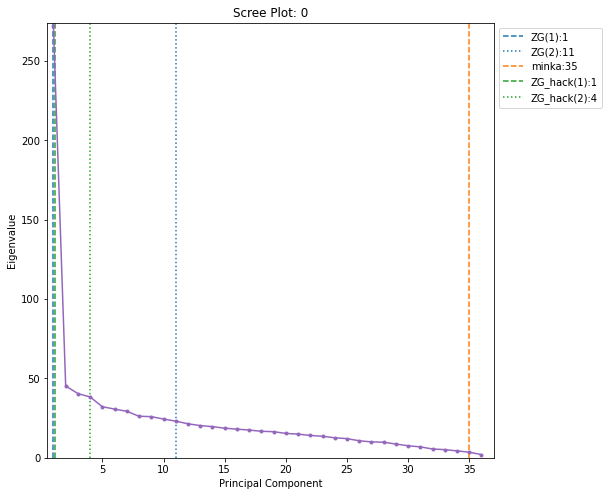

1 (20000, 16)


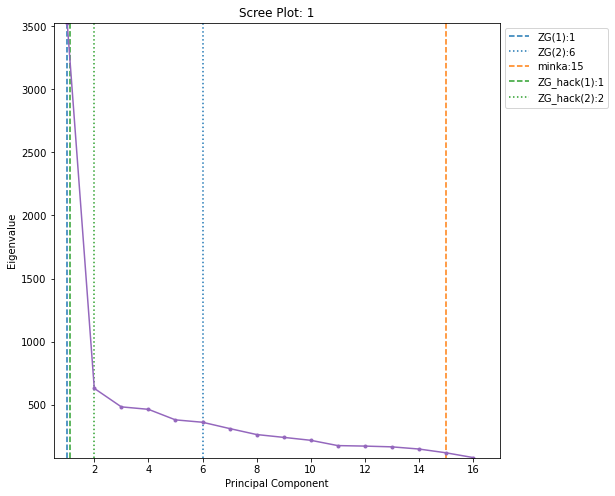

2 (625, 4)


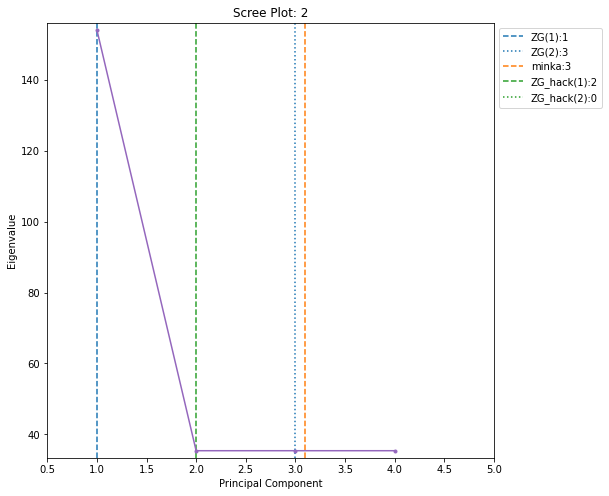

4 (2000, 76)


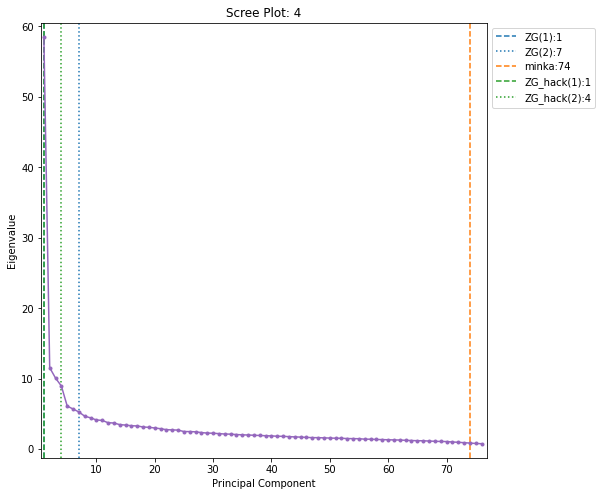

6 (2000, 64)


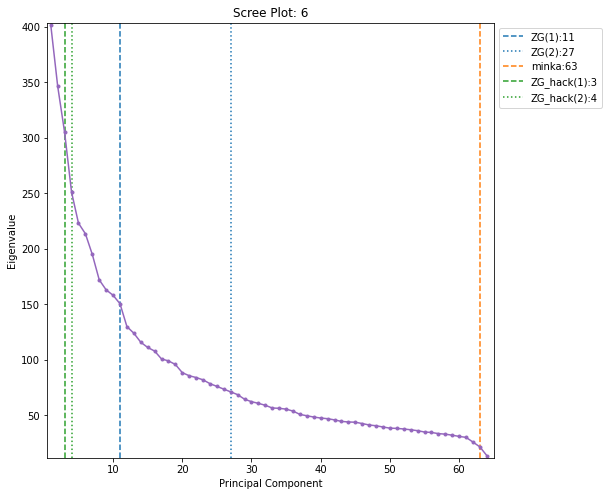

7 (2000, 6)


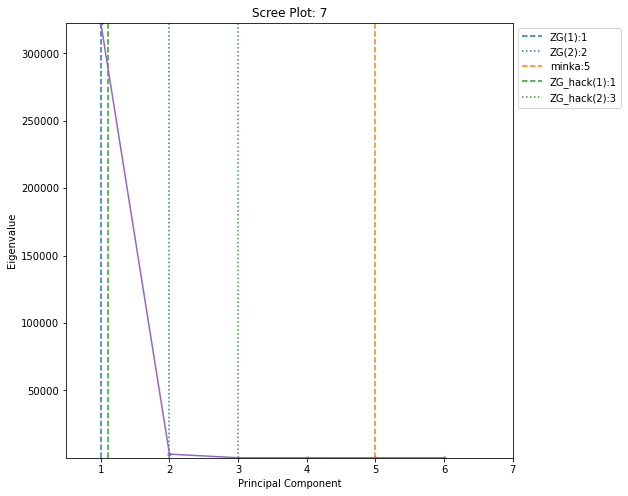

8 (2000, 47)


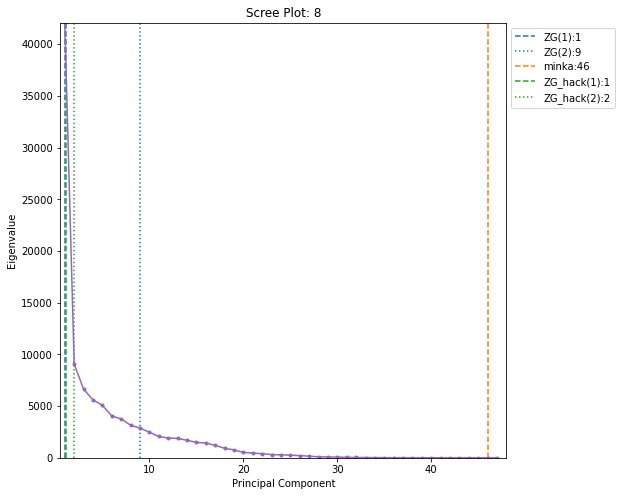

9 (1473, 9)


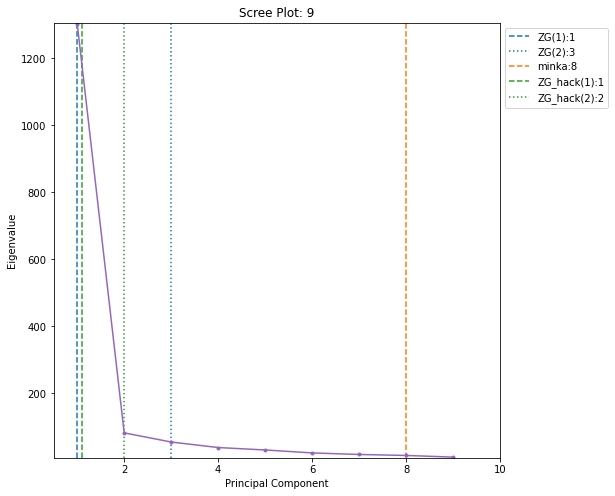

10 (5620, 64)


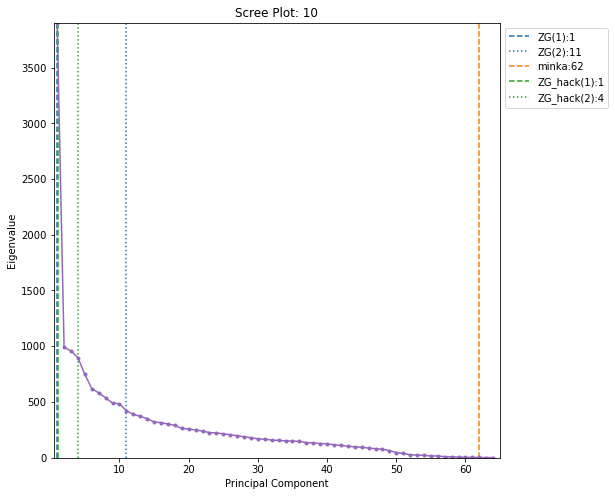

12 (1000, 20)


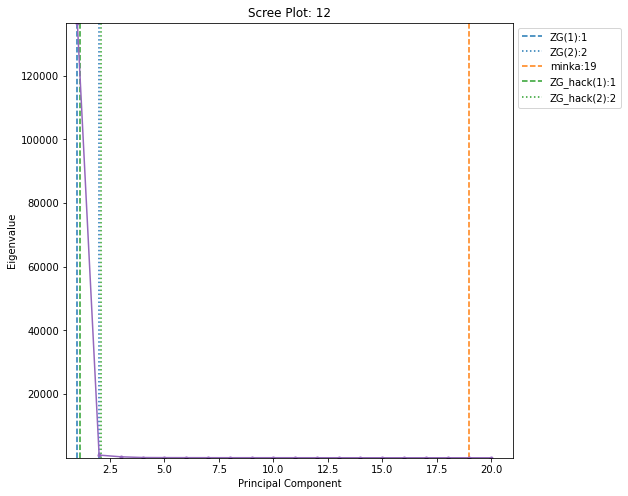

13 (10992, 16)


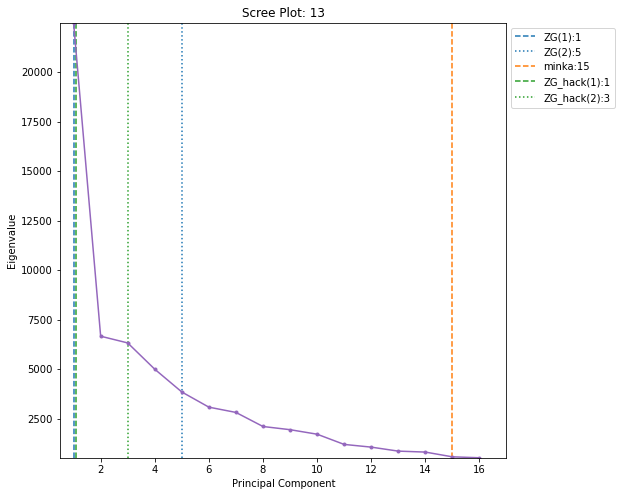

14 (768, 8)


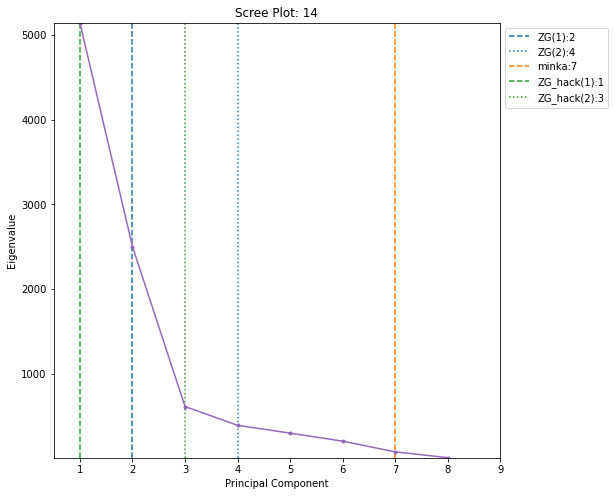

15 (4601, 57)


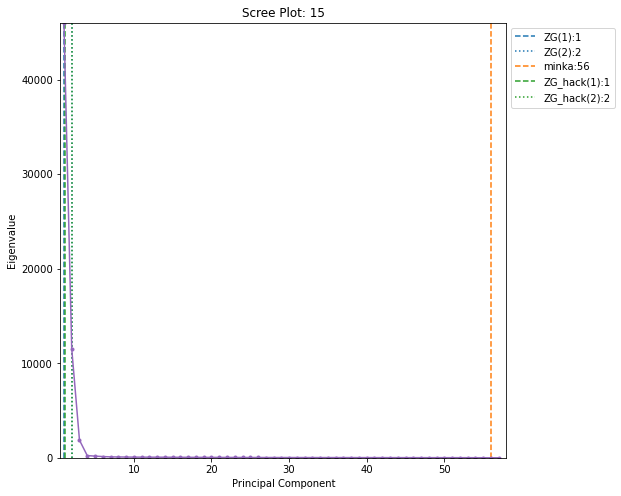

16 (3190, 60)


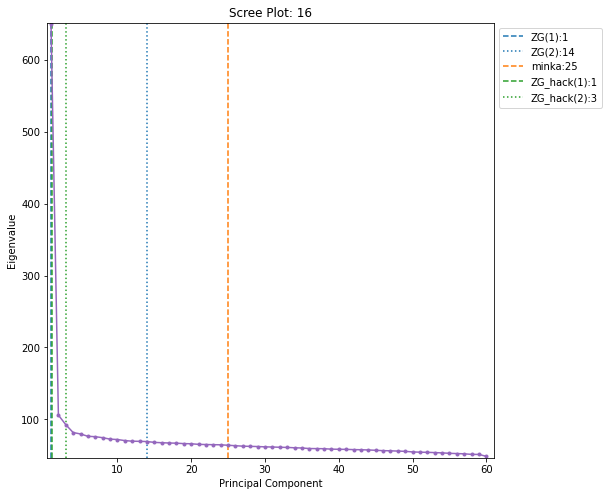

17 (958, 9)


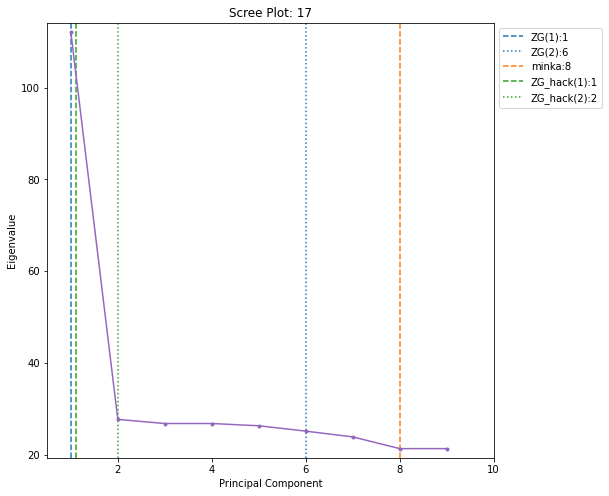

18 (846, 18)


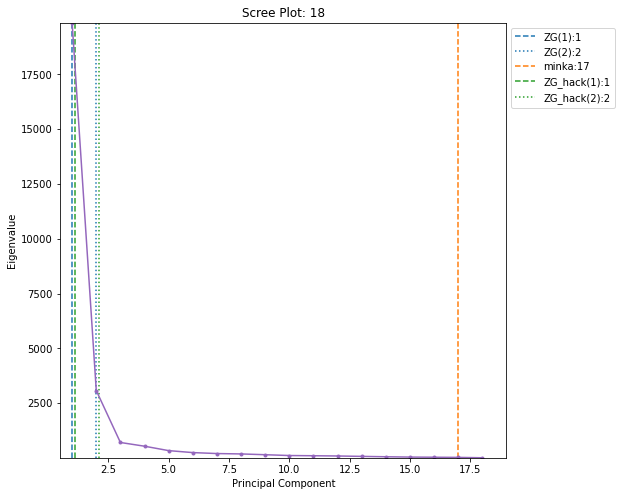

19 (45312, 8)


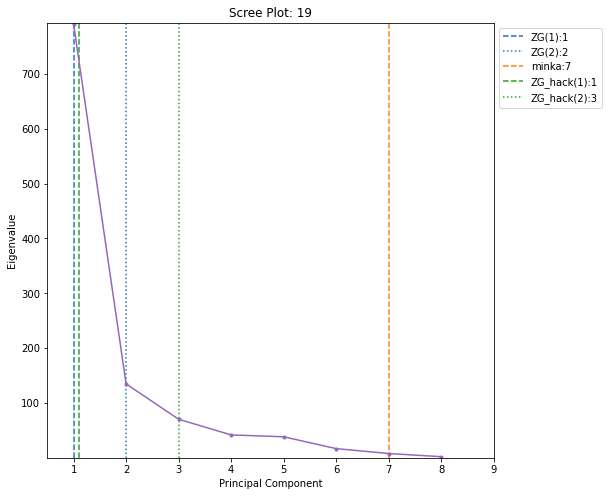

20 (6430, 36)


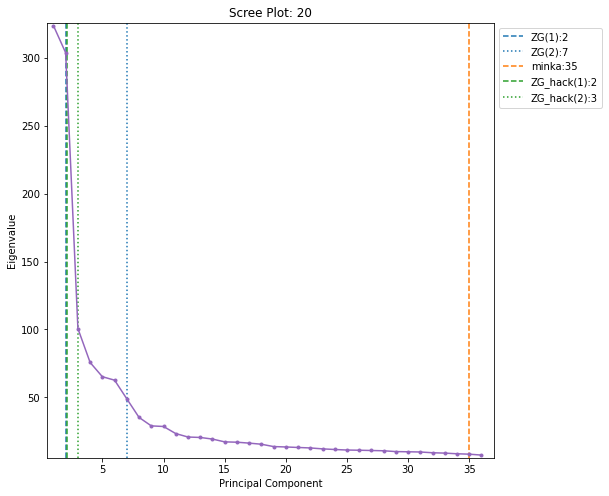

23 (990, 12)


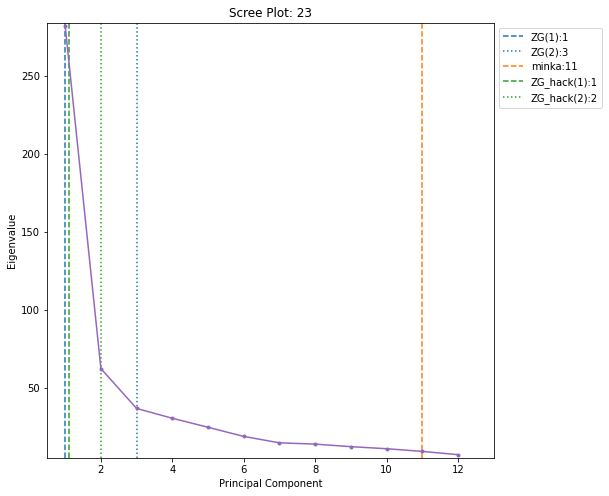

25 (841, 70)


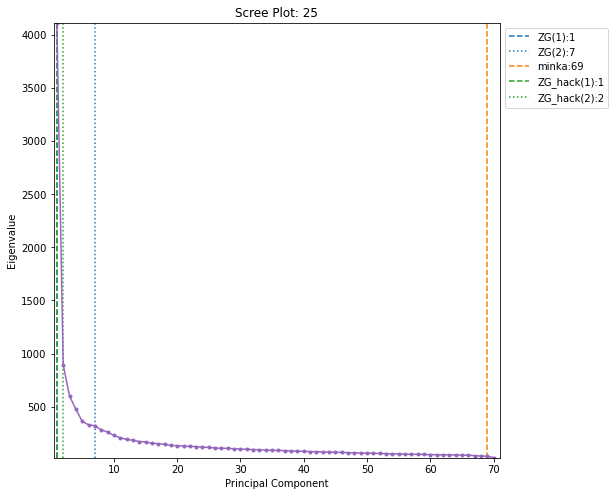

26 (797, 4)


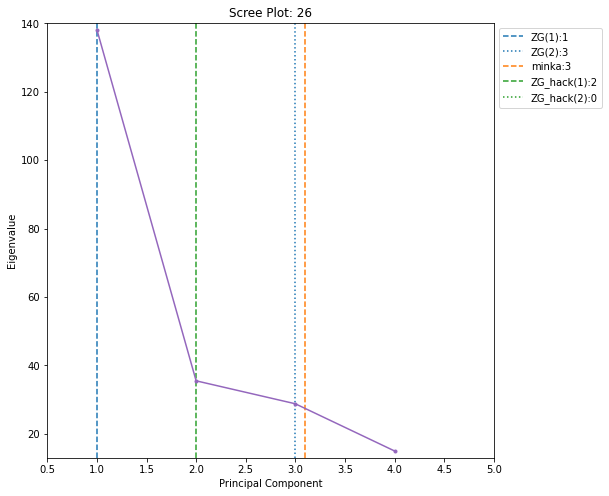

28 (1458, 37)
ERROR 28 0
ERROR 28 1
ERROR 28 2
ERROR 28 3
ERROR 28 4
ERROR 28 5
ERROR 28 6
ERROR 28 7
ERROR 28 8
ERROR 28 9
ERROR 28 10
ERROR 28 11
ERROR 28 12
ERROR 28 13
ERROR 28 14
ERROR 28 15
ERROR 28 16
ERROR 28 17
ERROR 28 18
ERROR 28 19
ERROR 28 20
ERROR 28 21
ERROR 28 22
ERROR 28 23
ERROR 28 24
ERROR 28 25
ERROR 28 26
ERROR 28 27
ERROR 28 28
ERROR 28 29
29 (1563, 37)
ERROR 29 0
ERROR 29 1
ERROR 29 2
ERROR 29 3
ERROR 29 4
ERROR 29 5
ERROR 29 6
ERROR 29 7
ERROR 29 8
ERROR 29 9
ERROR 29 10
ERROR 29 11
ERROR 29 12
ERROR 29 13
ERROR 29 14
ERROR 29 15
ERROR 29 16
ERROR 29 17
ERROR 29 18
ERROR 29 19
ERROR 29 20
ERROR 29 21
ERROR 29 22
ERROR 29 23
ERROR 29 24
ERROR 29 25
ERROR 29 26
ERROR 29 27
ERROR 29 28
ERROR 29 29
31 (522, 21)


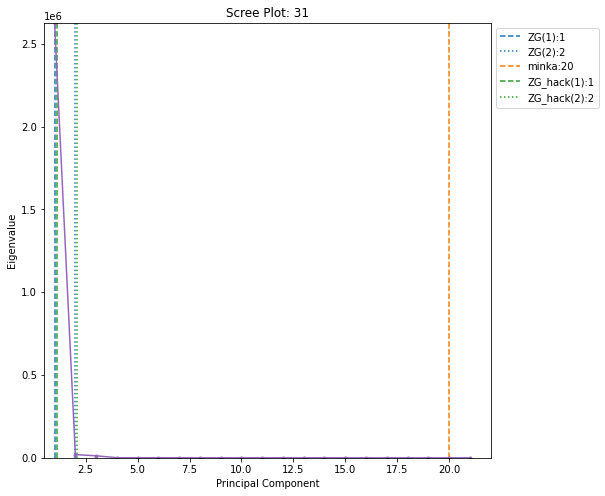

32 (2109, 21)


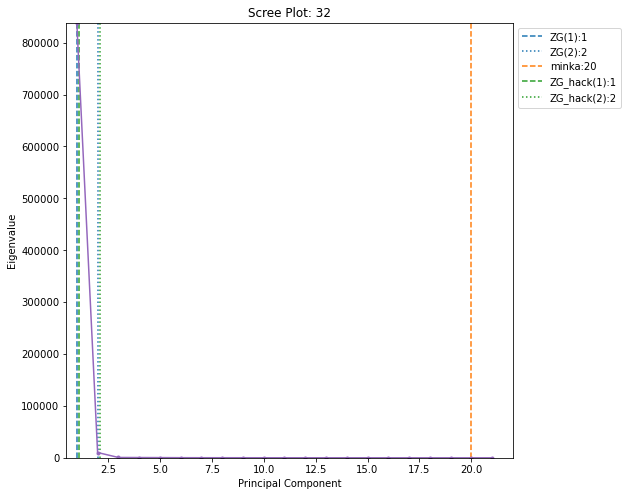

33 (1109, 21)


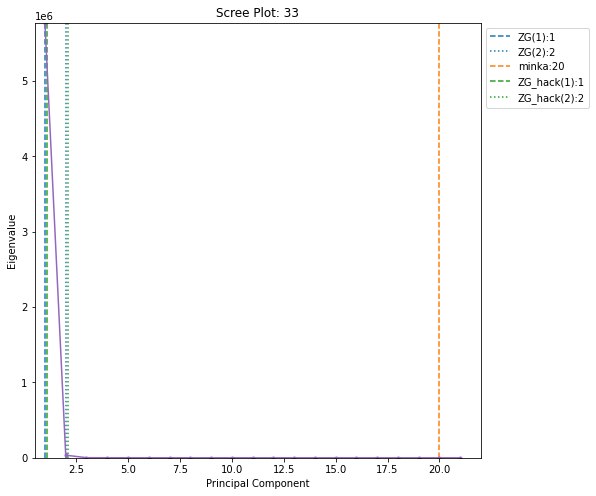

36 (569, 30)


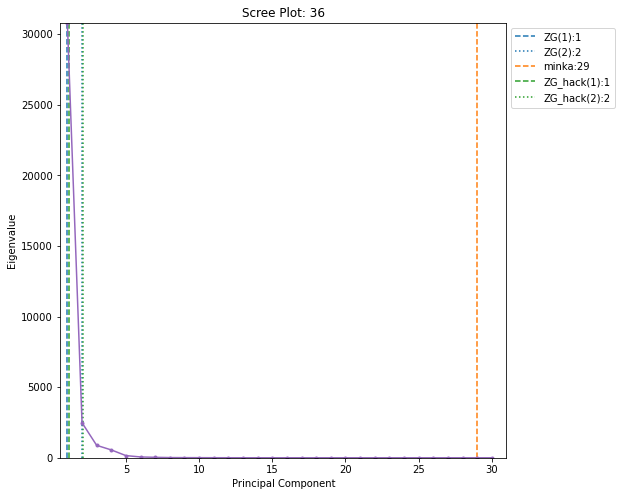

37 (5404, 5)


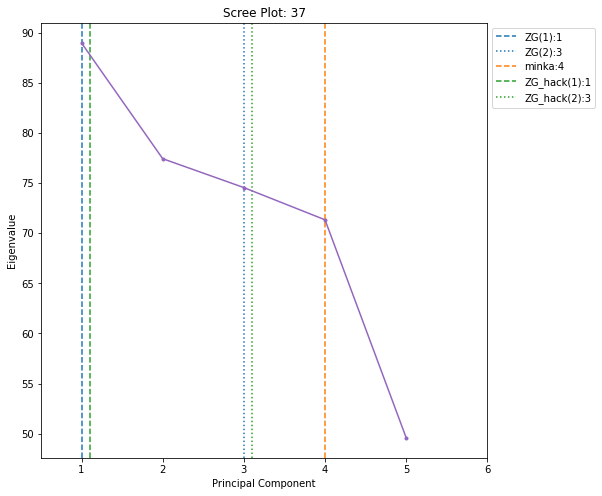

38 (1055, 41)


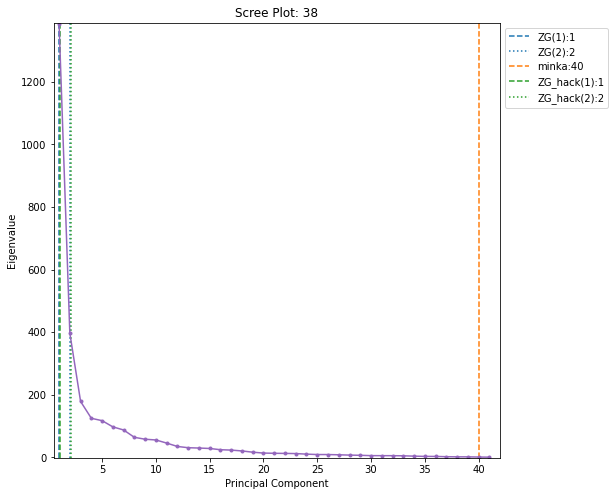

39 (5456, 24)


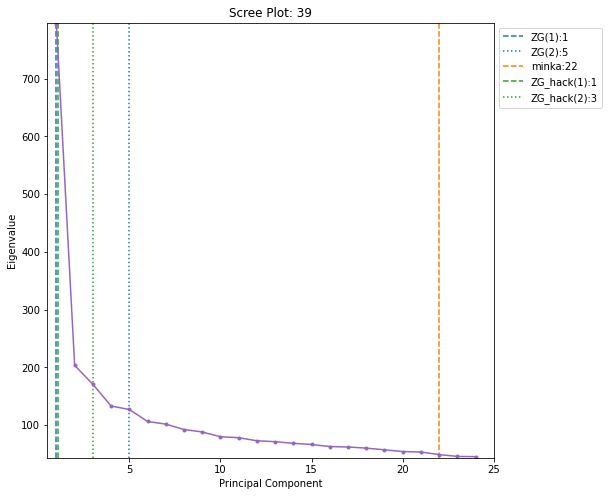

41 (583, 10)


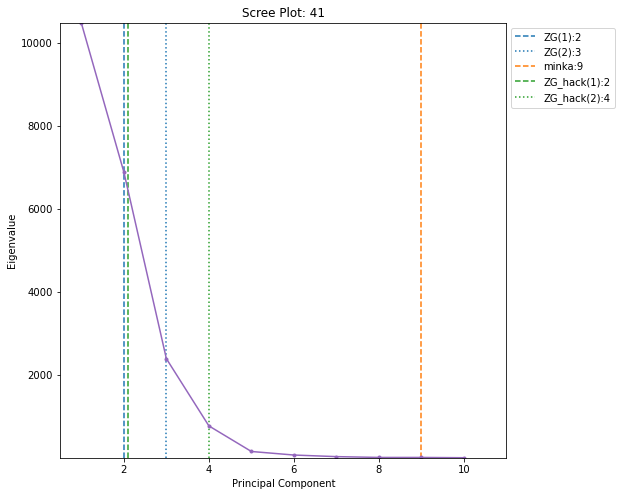

43 (34465, 118)
ERROR 43 0
ERROR 43 1
ERROR 43 2
ERROR 43 3
ERROR 43 4
ERROR 43 5
ERROR 43 6
ERROR 43 7
ERROR 43 8
ERROR 43 9
ERROR 43 10
ERROR 43 11
ERROR 43 12
ERROR 43 13
ERROR 43 14
ERROR 43 15
ERROR 43 16
ERROR 43 17
ERROR 43 18
ERROR 43 19
ERROR 43 20
ERROR 43 21
ERROR 43 22
ERROR 43 23
ERROR 43 24
ERROR 43 25
ERROR 43 26
ERROR 43 27
ERROR 43 28
ERROR 43 29
44 (2534, 72)


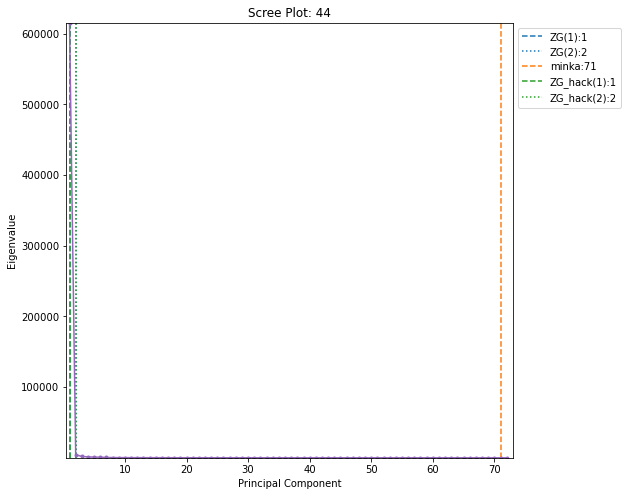

46 (6118, 51)


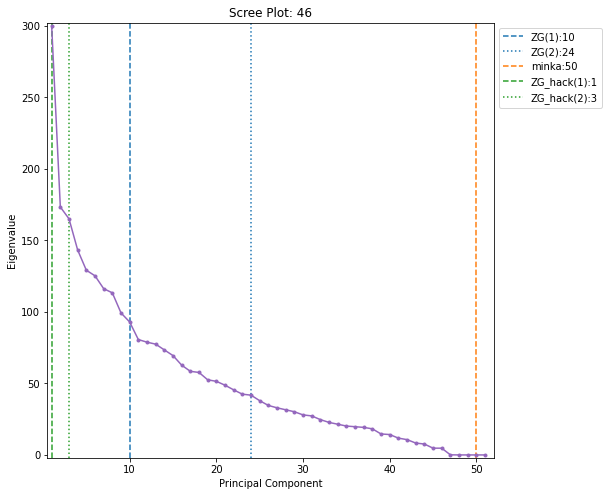

47 (1372, 4)


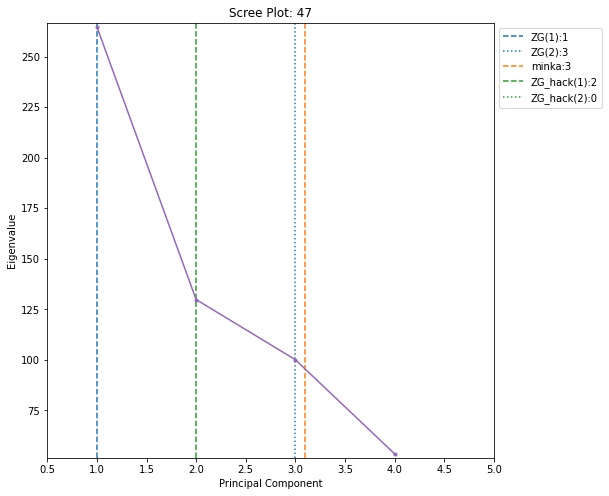

48 (748, 4)


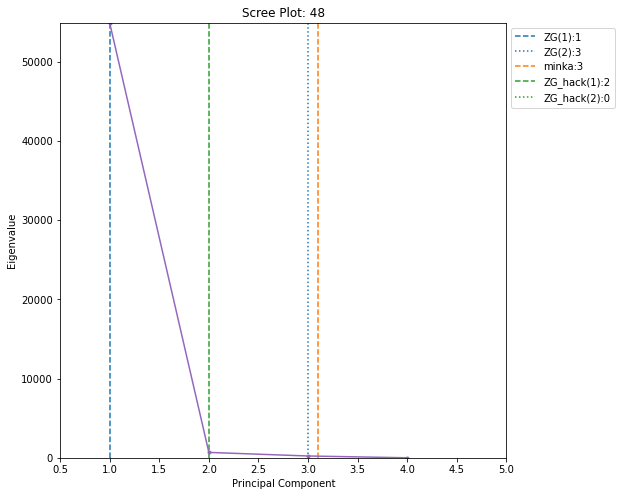

49 (11055, 30)


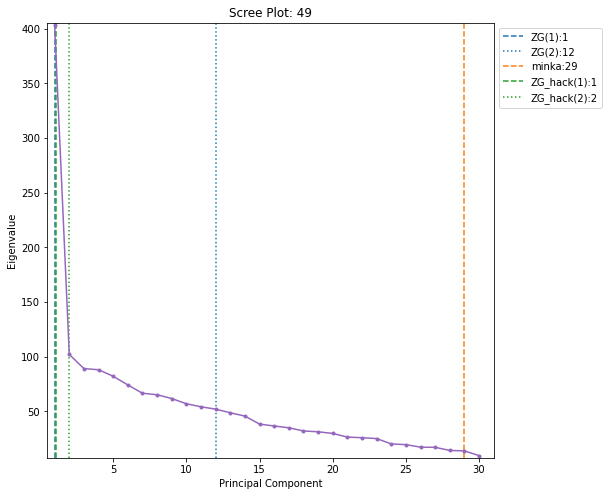

51 (45211, 16)


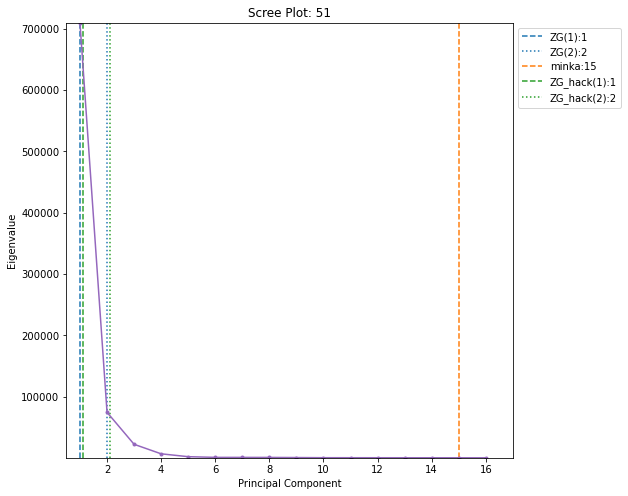

52 (9873, 32)


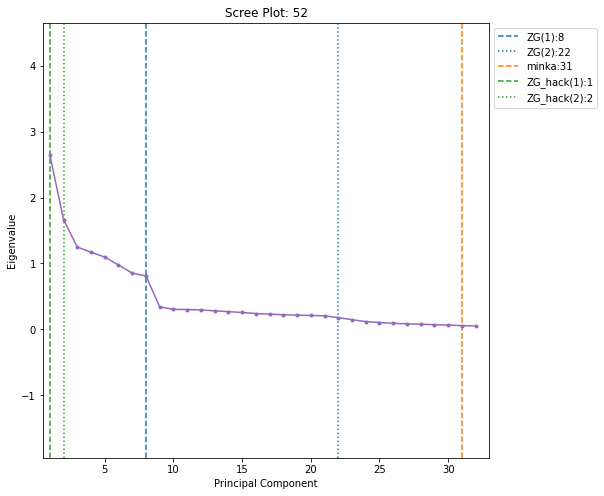

55 (5500, 40)


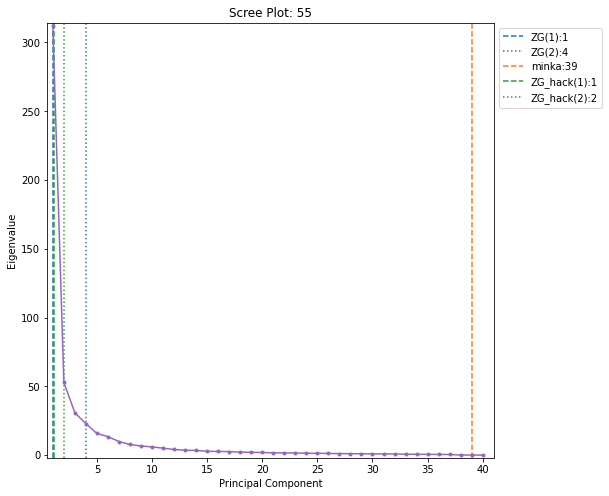

56 (67557, 42)


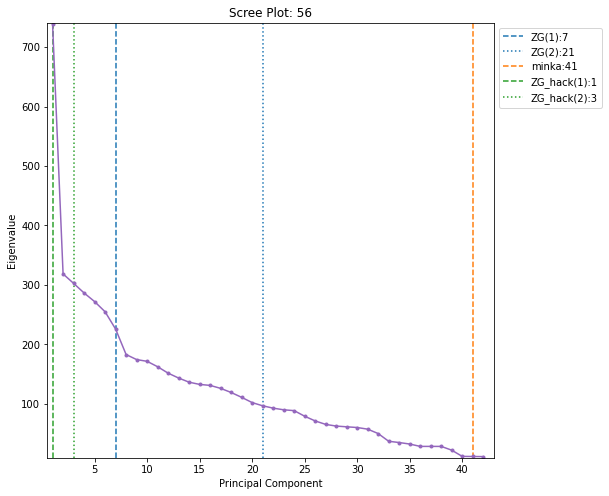

58 (1941, 27)
ERROR 58 0
ERROR 58 1
ERROR 58 2
ERROR 58 3
ERROR 58 4
ERROR 58 5
ERROR 58 6
ERROR 58 7
ERROR 58 8
ERROR 58 9
ERROR 58 10
ERROR 58 11
ERROR 58 12
ERROR 58 13
ERROR 58 14
ERROR 58 15
ERROR 58 16
ERROR 58 17
ERROR 58 18
ERROR 58 19
ERROR 58 20
ERROR 58 21
ERROR 58 22
ERROR 58 23
ERROR 58 24
ERROR 58 25
ERROR 58 26
ERROR 58 27
ERROR 58 28
ERROR 58 29
59 (540, 18)


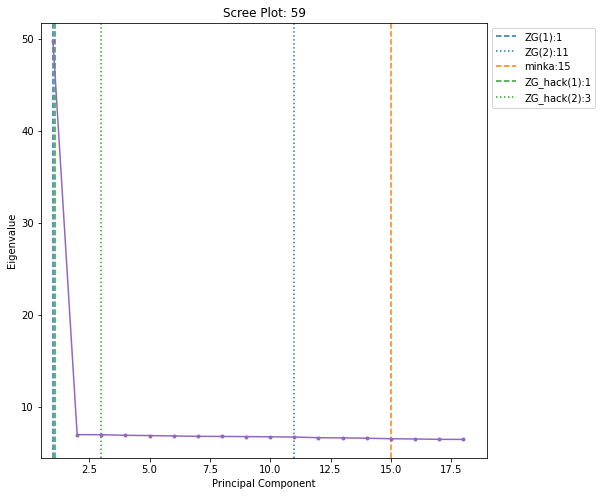

60 (4839, 5)


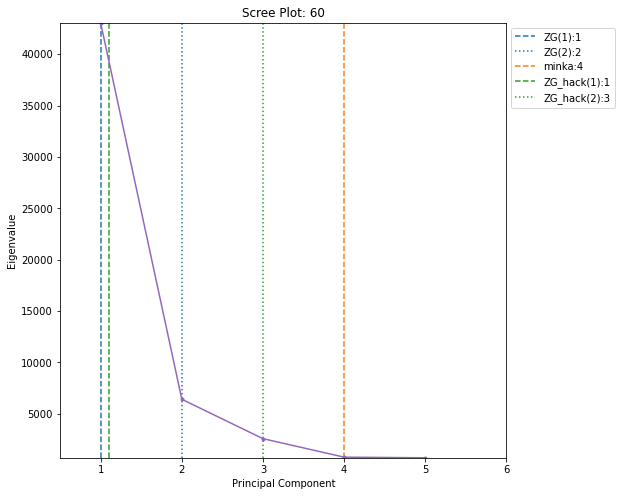

61 (1728, 6)


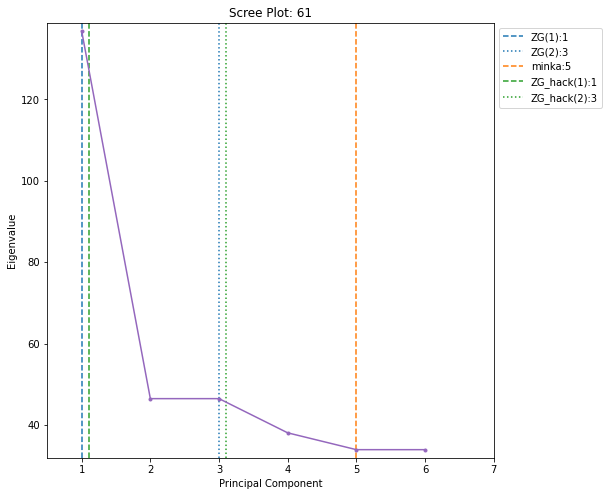

62 (2310, 16)


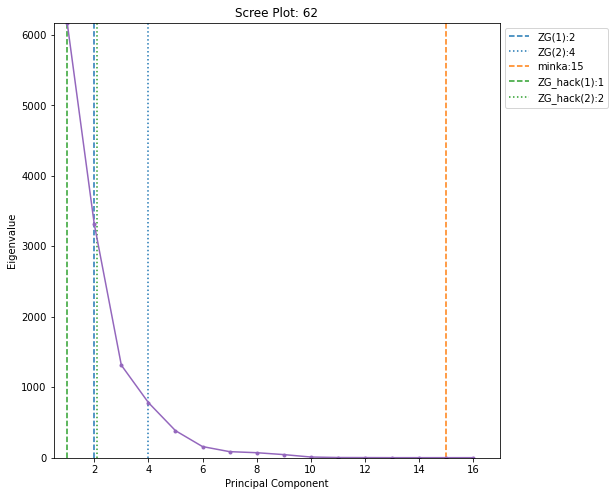

65 (44819, 6)


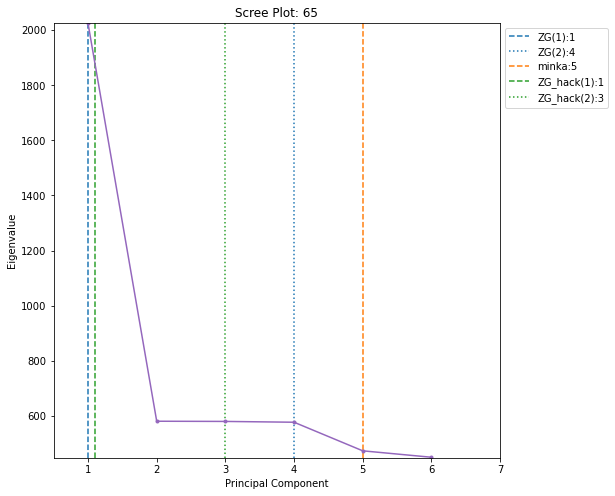

66 (96320, 21)


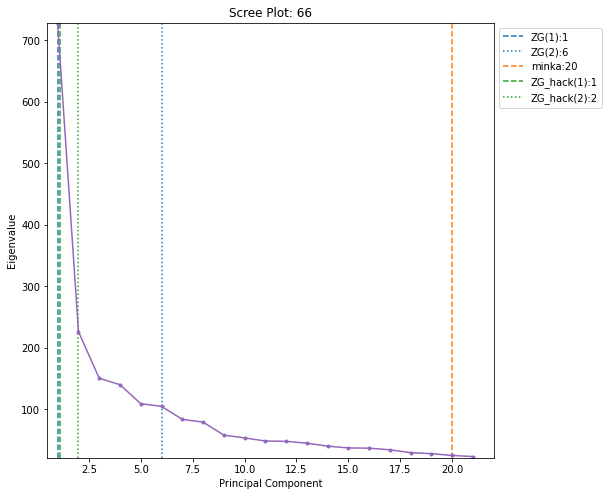

In [11]:
from matplotlib import pyplot as plt
import os
all_sims_dims = []
all_dims= []
all_data = []
all_ys = []
all_sims_colors = []
all_trues = []



dims_minka_all = []
dims_ZG_1_all = []
dims_ZG_2_all = []
dims_ZG_h_1_all = []
dims_ZG_h_2_all = []
for i, task_id in enumerate(benchmark_suite.tasks):  # iterate over all tasks
    if i > 66:
        break
    task = openml.tasks.get_task(task_id)  # download the OpenML task
    A, y = task.get_X_and_y()  # get the data
    if np.isnan(np.sum(A)) or A.shape[1] > 200:
        continue
    print(i, A.shape)
    
    dims_minka = []
    dims_ZG_1 = []
    dims_ZG_2 = []
    dims_ZG_h_1 = []
    dims_ZG_h_2 = []
    error = False
    for j in range(30):
        try:
            dims_minka.append(minka(A))
        except:
            print("ERROR", i, j)
            error = True
            continue
        d = select_dimension(A, n_components = A.shape[1] - 1)
        # due to the function not always returning two element list we only append the first 
        d_h = select_dimension(A)
        # due to the function not always returning two element list we only append the first
        dims_ZG_1.append(d[0][0])
        dims_ZG_h_1.append(d_h[0][0])
        if len(d[0]) > 1:
            dims_ZG_2.append(d[0][1])
        else:
            dims_ZG_2.append(0)
        if len(d_h[0]) > 1:
            dims_ZG_h_2.append(d_h[0][1])
        else:
            dims_ZG_h_2.append(0)
        
        
    if not error:
        dims_ZG_1 = np.asarray(dims_ZG_1)
        dims_ZG_1_all.append(dims_ZG_1)
        
        dims_minka = np.asarray(dims_minka)
        dims_minka_all.append(dims_minka)
        
        dims_ZG_2 = np.asarray(dims_ZG_2)
        dims_ZG_2_all.append(dims_ZG_2)
        
        dims_ZG_h_1 = np.asarray(dims_ZG_h_1)
        dims_ZG_h_1_all.append(dims_ZG_h_1)
        
        dims_ZG_h_2 = np.asarray(dims_ZG_h_2)
        dims_ZG_h_2_all.append(dims_ZG_h_2)
        
        dims_ = [int(np.median(dims_ZG_1)), int(np.median(dims_ZG_2)), int(np.median(dims_minka)), int(np.median(dims_ZG_h_1)), int(np.median(dims_ZG_h_2))]
        all_dims.append(dims_)
        all_data.append(A)
        all_ys.append(y)
        scree_2(A,dims_ZG_1,dims_ZG_2 , dims_minka, dims_ZG_h_1, dims_ZG_h_2)
        plt.title('Scree Plot: ' + str(i))
        
        direc = r'D:\Hopkins\Hopkins_senior\Neurodata\ndd_prac\ndd_stuff\sprint2\scree_plts_no_dim_select'
        full_dir = os.path.join(direc, 'fig' + str(i) + '.png')
        plt.savefig(full_dir)
        plt.show()

import pickle
with open('surv_dims.pkl', 'wb') as f:
    pickle.dump(all_dims, f)
    

with open('all_data.pkl', 'wb') as f:
    pickle.dump(all_data, f)

with open('all_ys.pkl', 'wb') as f:
    pickle.dump(all_ys, f)

In [12]:
with open('dims_ZG_1_all.pkl', 'wb') as f:
    pickle.dump(dims_ZG_1_all, f)
    
with open('dims_minka_all.pkl', 'wb') as f:
    pickle.dump(dims_minka_all, f)
    
with open('dims_ZG_2_all.pkl', 'wb') as f:
    pickle.dump(dims_ZG_2_all, f)
    
with open('dims_ZG_h_1_all.pkl', 'wb') as f:
    pickle.dump(dims_ZG_h_1_all, f)
    
with open('dims_ZG_h_2_all.pkl', 'wb') as f:
    pickle.dump(dims_ZG_h_2_all, f)
    

